# USD

## Plot results

#### PyTorch results

In [1]:
import os
from typing import List

from plot import make_plots

dir_path = os.path.abspath('')
results_dir = 'data'
all_experiments = [name for name in os.listdir(os.path.join(dir_path, '..',  results_dir))]

In [2]:
def print_labels_explanation(tf_labels: List[str], tf_dirs: List[str]) -> None:
    for label, dir in zip (tf_labels, tf_dirs):
        gamma, clip, target_kl = dir.split('half-cheetah_halfcheetah-v2_')[1].split('_')
        gamma = gamma[3:].replace('-', '.')
        clip = clip[3:].replace('-', '.')
        target_kl = target_kl[3:].replace('-', '.')
        title = f'Experiment - gamma={gamma}, clip_ratio={clip}, targe_kl={target_kl}'
        print(f'Label: {label} - experiment: {title}')

In [3]:
pytorch_dirs = [os.path.join(dir_path, '..',  results_dir, dir) for dir in all_experiments if 'pyt' in dir]
pytorch_labels = [str(i) for i in range(1, len(pytorch_dirs) + 1)]

print_labels_explanation(pytorch_labels, pytorch_dirs)

Label: 1 - experiment: Experiment - gamma=0.89, clip_ratio=0.2, targe_kl=0.01
Label: 2 - experiment: Experiment - gamma=0.94, clip_ratio=0.3, targe_kl=0.05
Label: 3 - experiment: Experiment - gamma=0.94, clip_ratio=0.1, targe_kl=0.01
Label: 4 - experiment: Experiment - gamma=0.99, clip_ratio=0.3, targe_kl=0.05
Label: 5 - experiment: Experiment - gamma=0.94, clip_ratio=0.1, targe_kl=0.05
Label: 6 - experiment: Experiment - gamma=0.89, clip_ratio=0.1, targe_kl=0.01
Label: 7 - experiment: Experiment - gamma=0.89, clip_ratio=0.2, targe_kl=0.05
Label: 8 - experiment: Experiment - gamma=0.94, clip_ratio=0.3, targe_kl=0.01
Label: 9 - experiment: Experiment - gamma=0.94, clip_ratio=0.2, targe_kl=0.05
Label: 10 - experiment: Experiment - gamma=0.89, clip_ratio=0.1, targe_kl=0.05
Label: 11 - experiment: Experiment - gamma=0.89, clip_ratio=0.3, targe_kl=0.01
Label: 12 - experiment: Experiment - gamma=0.94, clip_ratio=0.2, targe_kl=0.01
Label: 13 - experiment: Experiment - gamma=0.89, clip_ratio=0

/home/artur/Documents/weiti/mgr/usd-ppo/venv/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


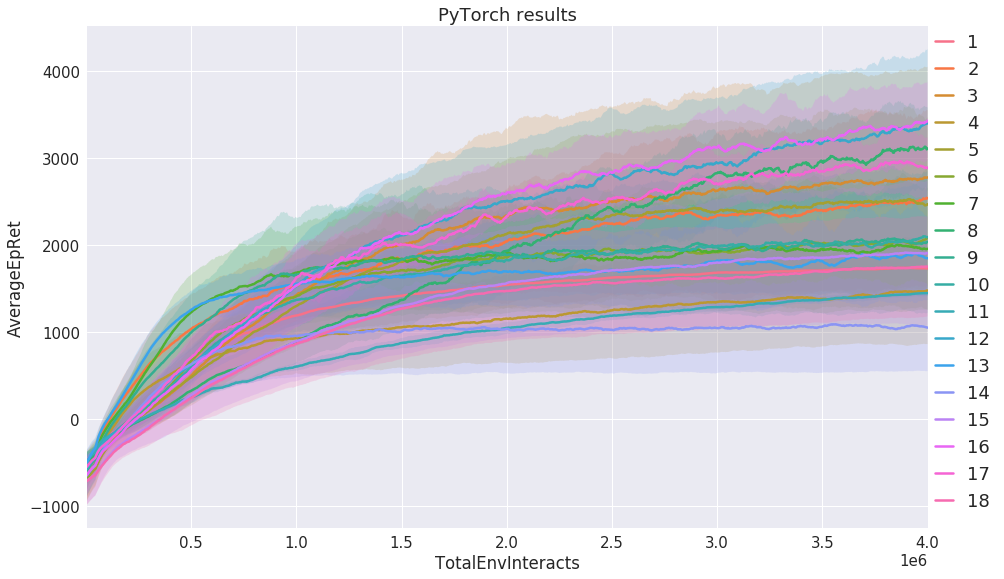

In [4]:
make_plots(all_logdirs=pytorch_dirs, legend=pytorch_labels, smooth=20, title='PyTorch results')

#### Tensorflow results

In [5]:
tf_dirs = [os.path.join(dir_path, '..',  results_dir, dir) for dir in all_experiments if 'tf1' in dir]
tf_labels = [str(i) for i in range(1, len(tf_dirs) + 1)]

print_labels_explanation(tf_labels, tf_dirs)

Label: 1 - experiment: Experiment - gamma=0.94, clip_ratio=0.1, targe_kl=0.05
Label: 2 - experiment: Experiment - gamma=0.89, clip_ratio=0.1, targe_kl=0.01
Label: 3 - experiment: Experiment - gamma=0.89, clip_ratio=0.3, targe_kl=0.05
Label: 4 - experiment: Experiment - gamma=0.99, clip_ratio=0.3, targe_kl=0.05
Label: 5 - experiment: Experiment - gamma=0.94, clip_ratio=0.2, targe_kl=0.05
Label: 6 - experiment: Experiment - gamma=0.94, clip_ratio=0.2, targe_kl=0.01
Label: 7 - experiment: Experiment - gamma=0.89, clip_ratio=0.2, targe_kl=0.01
Label: 8 - experiment: Experiment - gamma=0.94, clip_ratio=0.3, targe_kl=0.01
Label: 9 - experiment: Experiment - gamma=0.89, clip_ratio=0.2, targe_kl=0.05
Label: 10 - experiment: Experiment - gamma=0.99, clip_ratio=0.2, targe_kl=0.01
Label: 11 - experiment: Experiment - gamma=0.99, clip_ratio=0.3, targe_kl=0.01
Label: 12 - experiment: Experiment - gamma=0.89, clip_ratio=0.3, targe_kl=0.01
Label: 13 - experiment: Experiment - gamma=0.94, clip_ratio=0

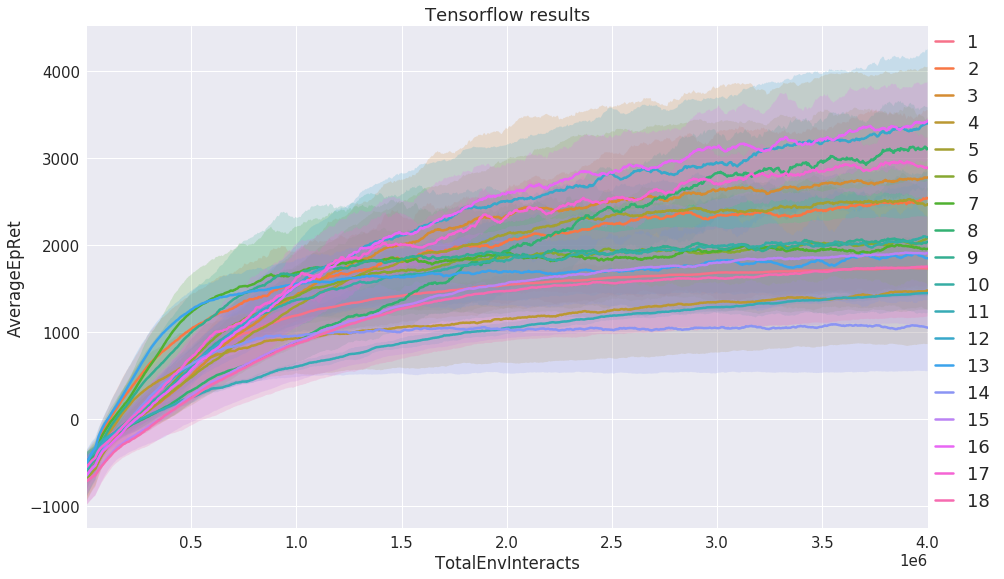

In [6]:
make_plots(all_logdirs=pytorch_dirs, legend=pytorch_labels, smooth=20, title='Tensorflow results')

#### Comparison between frameworks

In [7]:
def plot_experiment(name: str) -> None:
    gamma, clip, target_kl = experiment_name.split('_')
    gamma = gamma[3:].replace('-', '.')
    clip = clip[3:].replace('-', '.')
    target_kl = target_kl[3:].replace('-', '.')
    title = f'Experiment - gamma={gamma}, clip_ratio={clip}, targe_kl={target_kl}'

    tf_experiment_dir = [ex_dir for ex_dir in tf_dirs if name in ex_dir]
    assert len(tf_experiment_dir) == 1
    pyt_experiment_dir = [ex_dir for ex_dir in pytorch_dirs if name in ex_dir]
    assert len(pyt_experiment_dir) == 1
    exp_dirs = [
        tf_experiment_dir[0],
        pyt_experiment_dir[0],
    ]
    exp_labels = ['Tensorflow', 'PyTorch']

    for label, dir in zip(exp_labels, exp_dirs):
        print(f'Label: {label} - experiment: {dir.split("/")[-1]}')

    make_plots(all_logdirs=exp_dirs, legend=exp_labels, smooth=20, title=title)

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-3_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-3_tar0-05


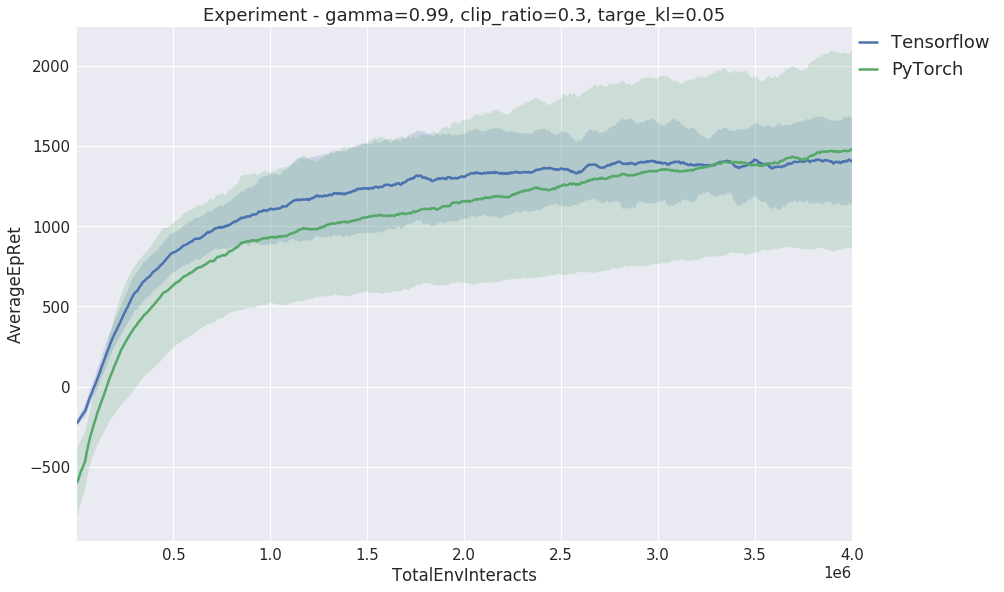

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-1_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-1_tar0-01


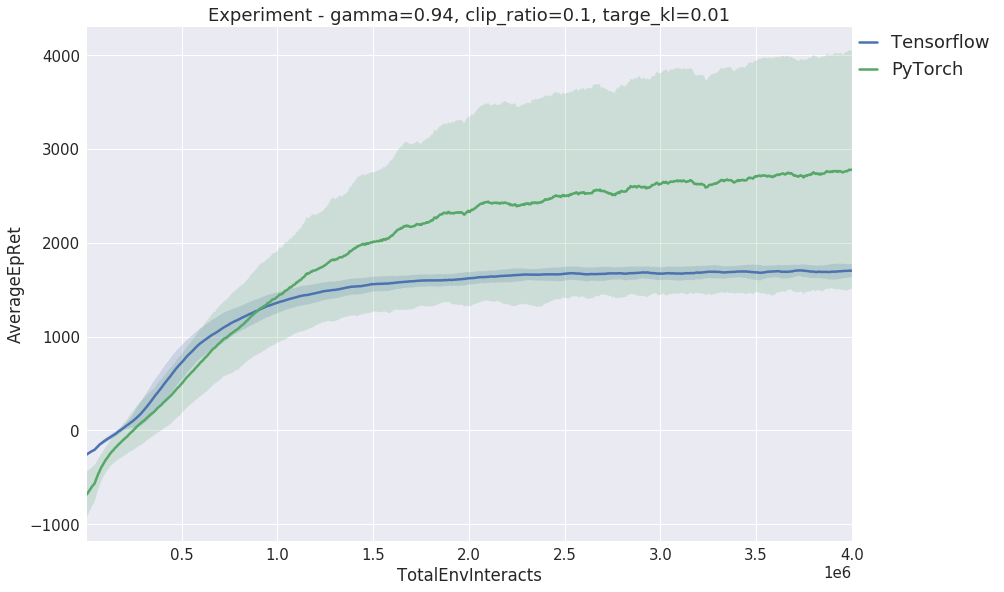

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-1_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-1_tar0-01


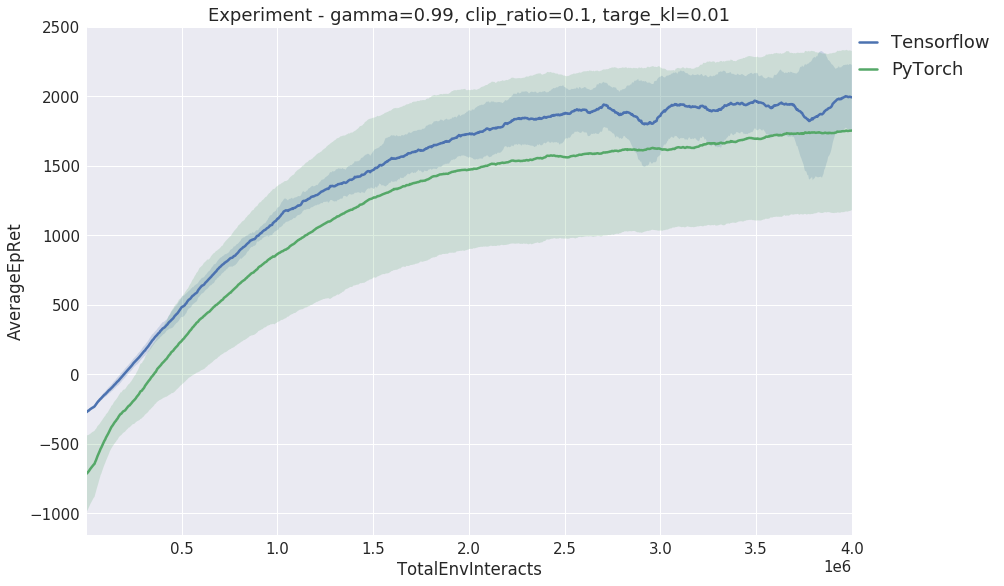

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-2_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-2_tar0-01


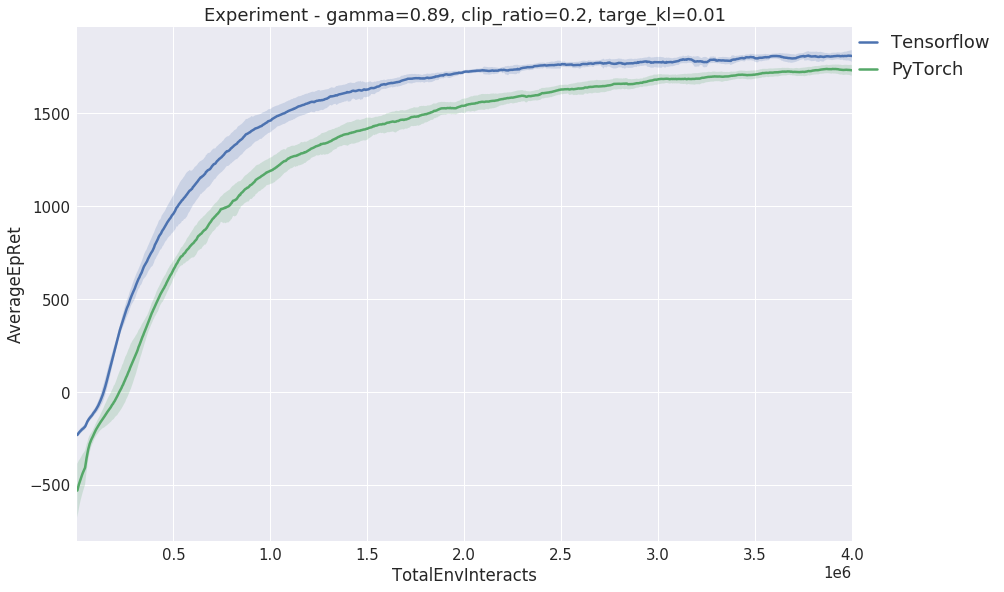

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-2_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-2_tar0-05


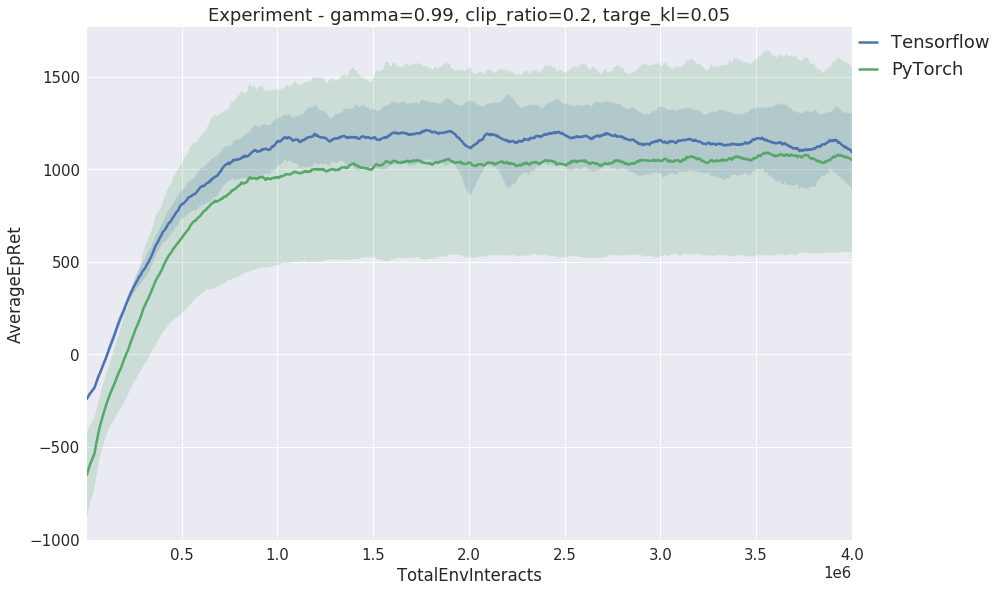

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-2_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-2_tar0-05


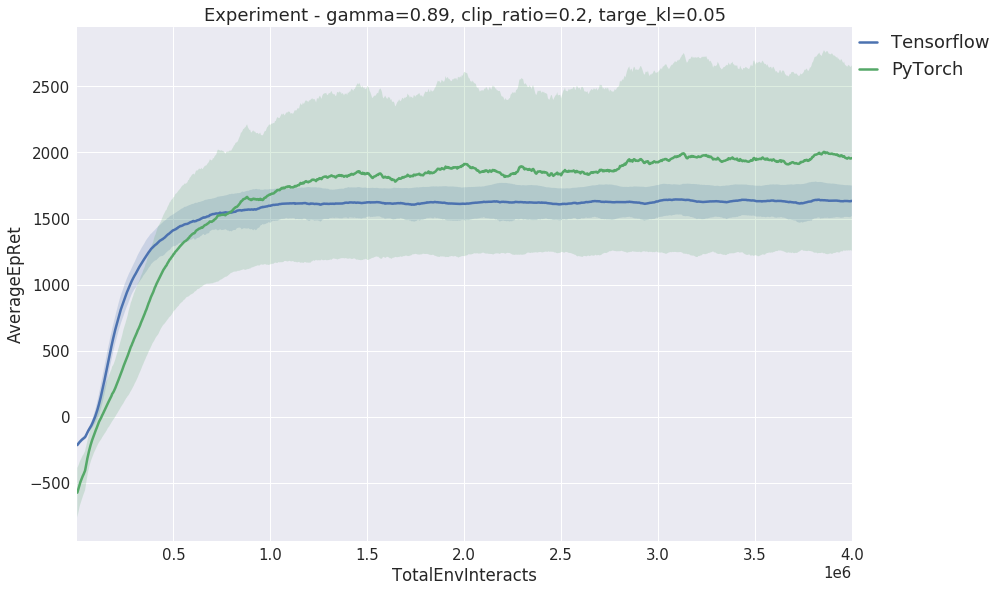

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-3_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-3_tar0-05


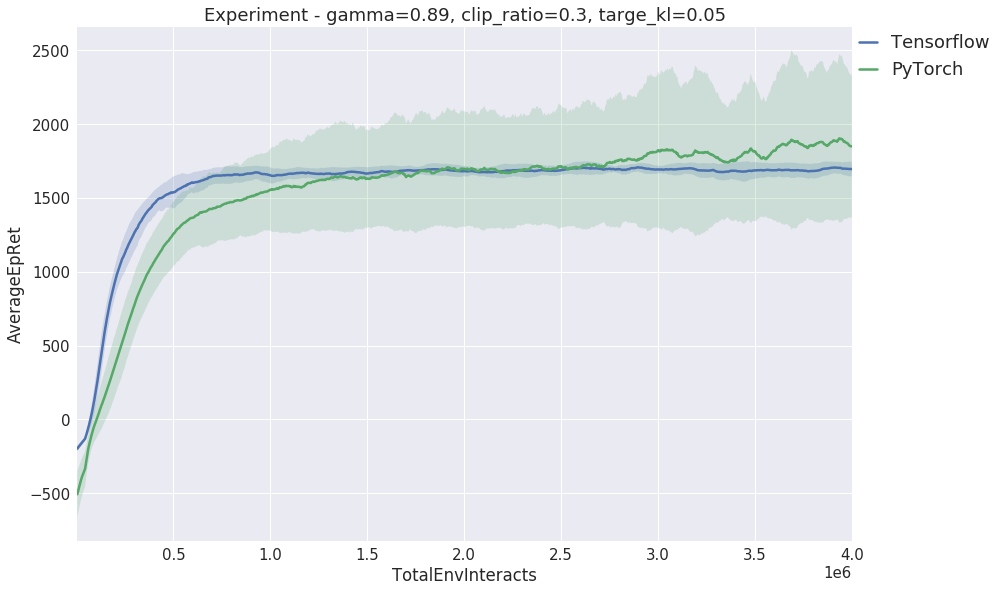

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-3_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-3_tar0-01


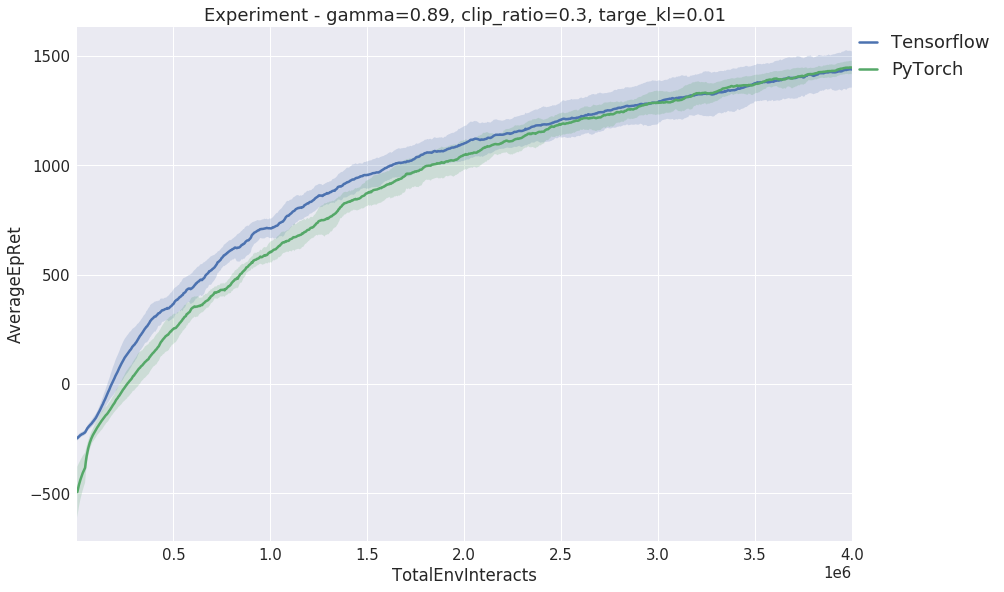

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-2_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-2_tar0-01


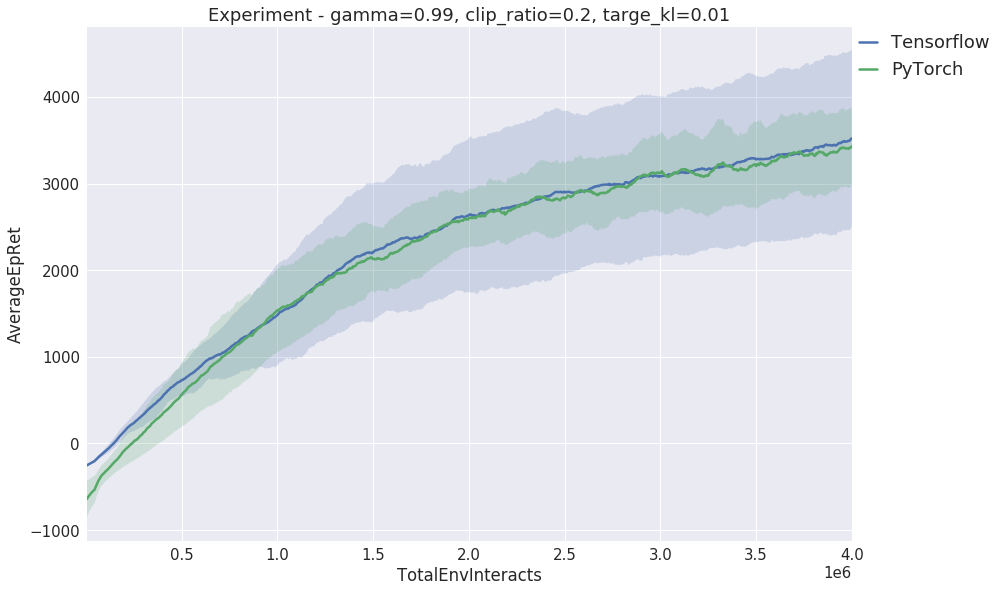

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-2_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-2_tar0-05


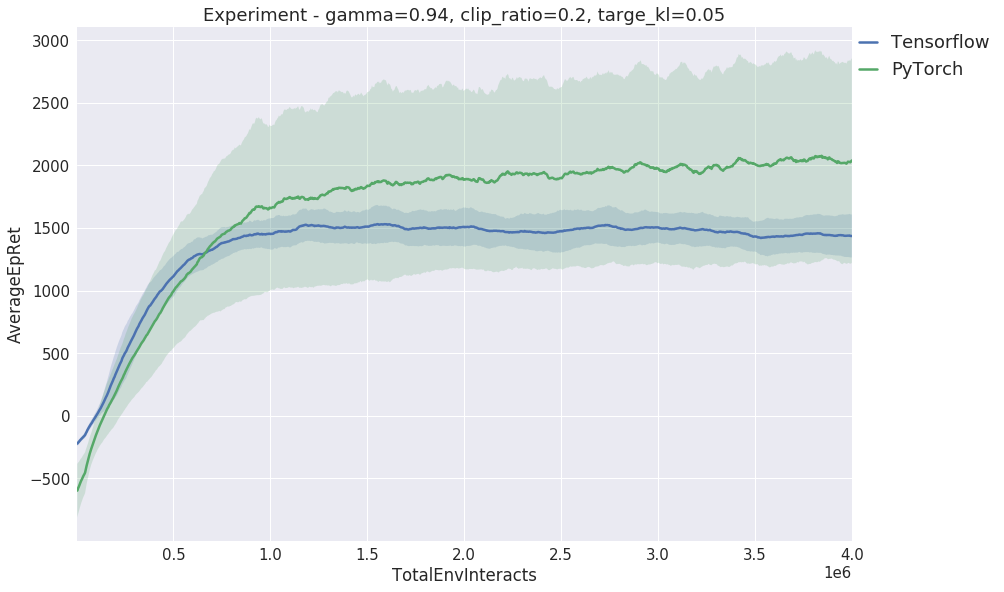

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-3_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-3_tar0-01


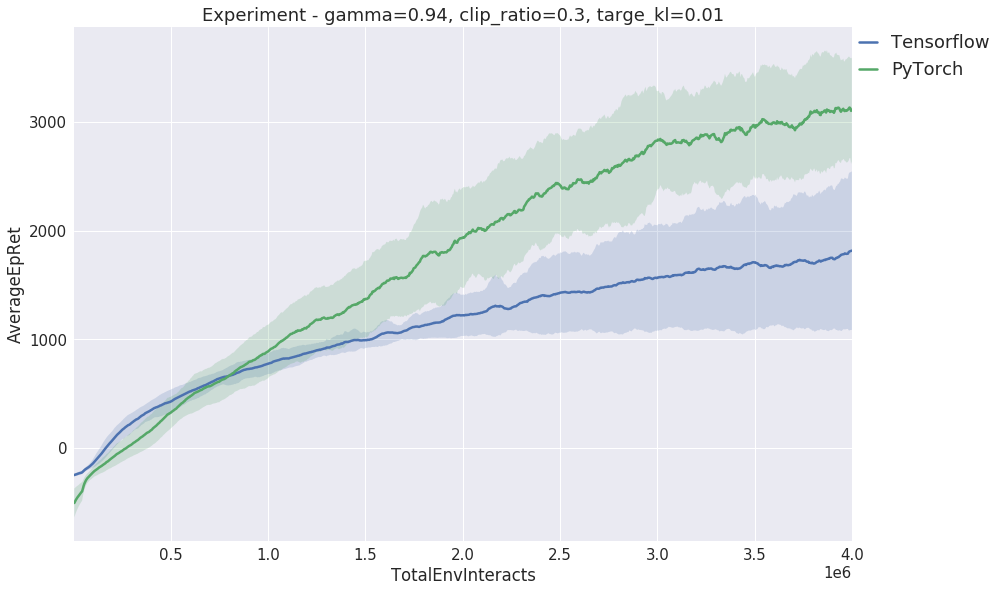

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-1_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-1_tar0-05


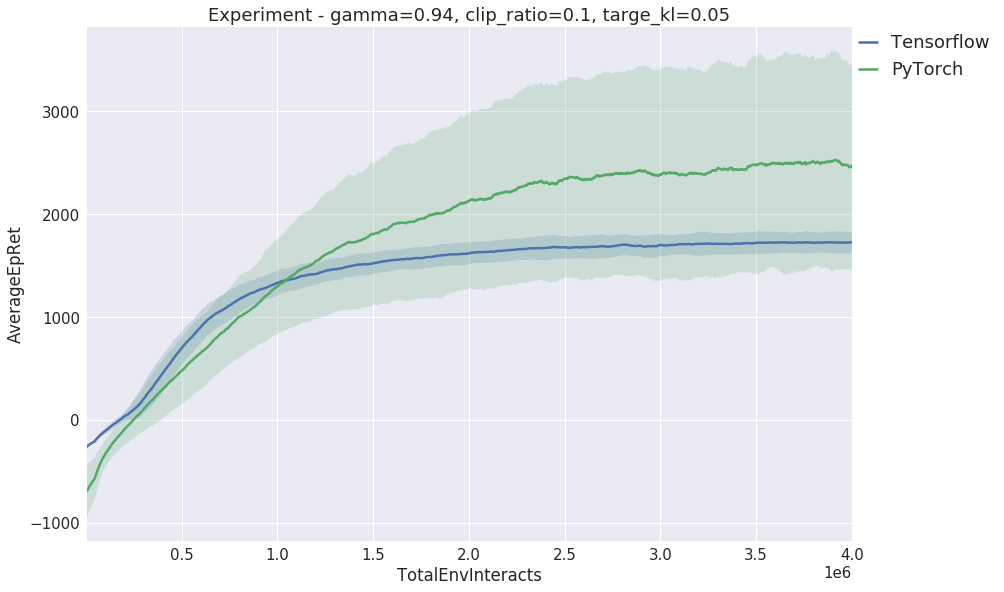

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-3_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-3_tar0-05


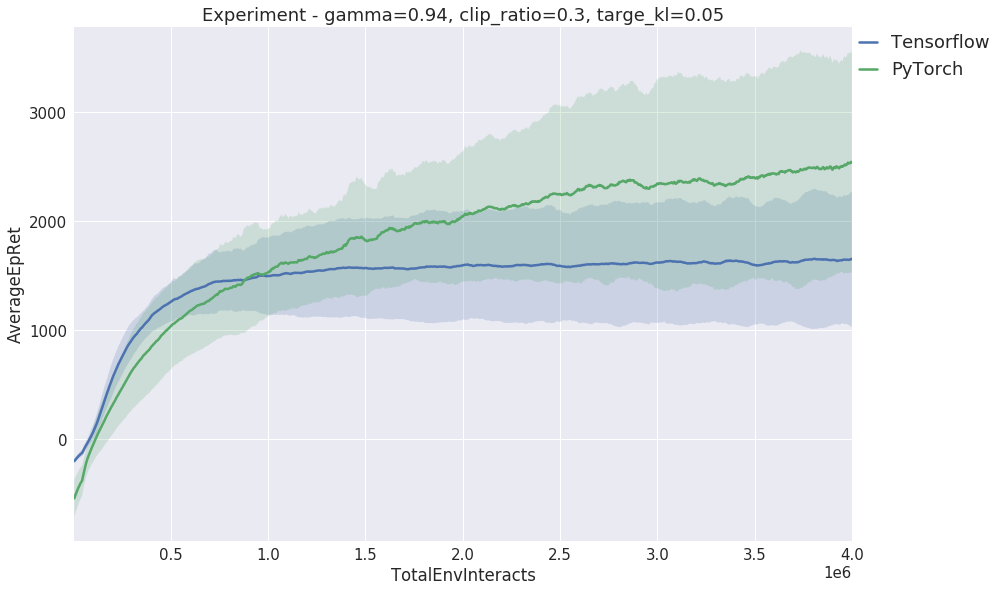

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-1_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-1_tar0-05


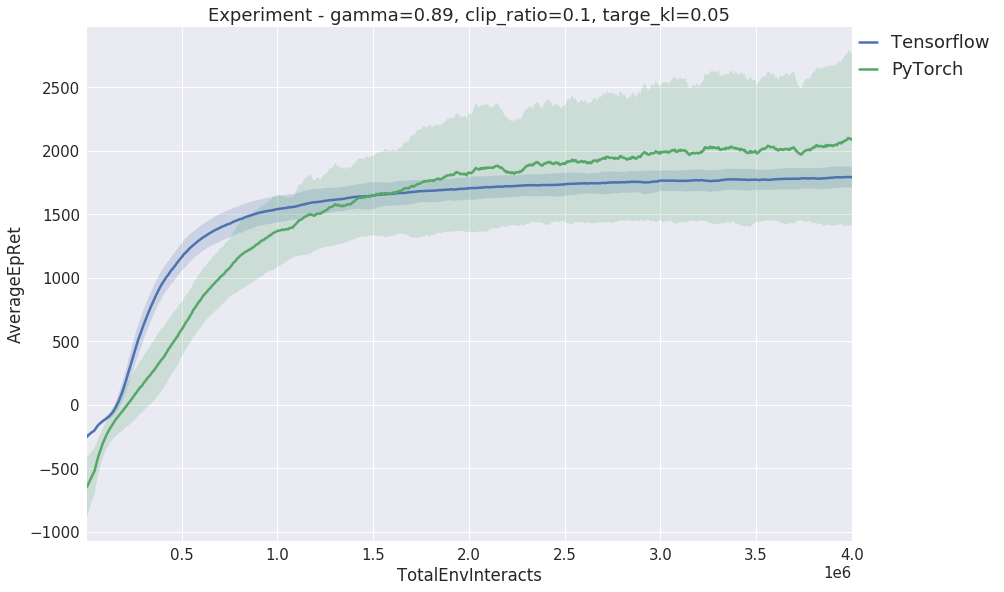

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-3_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-3_tar0-01


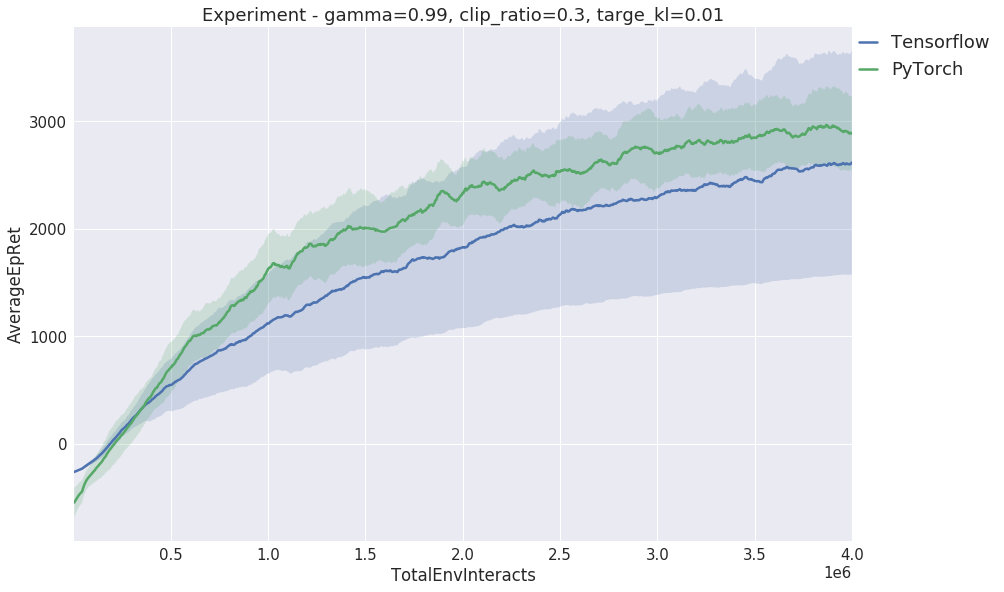

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-89_cli0-1_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-89_cli0-1_tar0-01


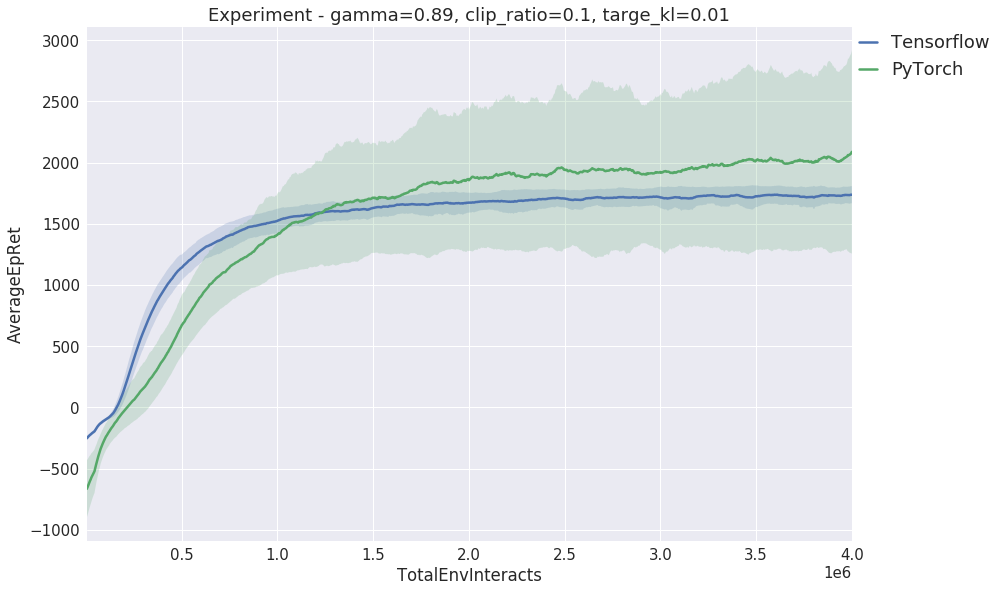

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-99_cli0-1_tar0-05
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-99_cli0-1_tar0-05


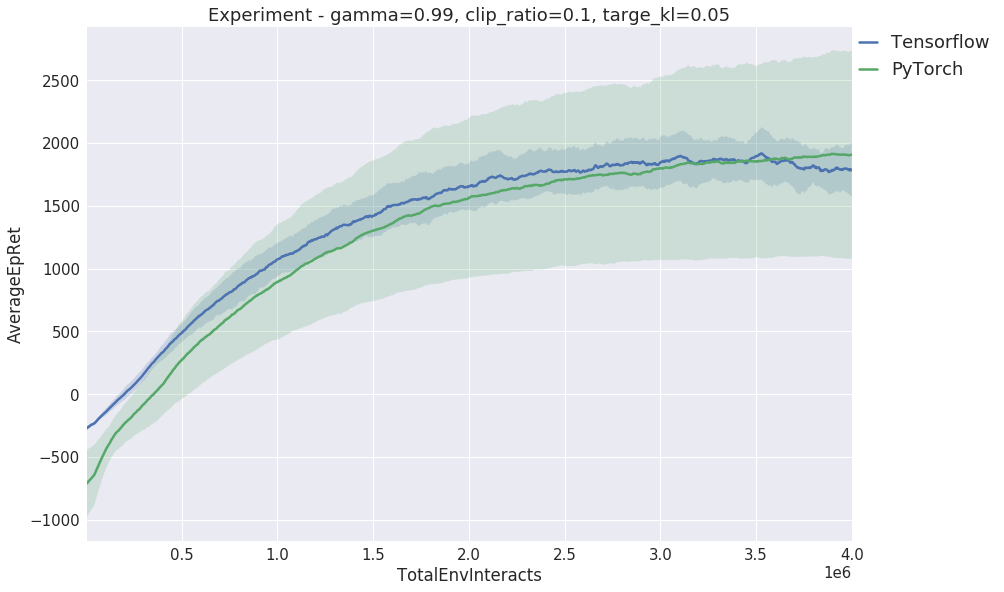

Label: Tensorflow - experiment: ppo-spinup-tf1-half-cheetah_halfcheetah-v2_gam0-94_cli0-2_tar0-01
Label: PyTorch - experiment: ppo-spinup-pyt-half-cheetah_halfcheetah-v2_gam0-94_cli0-2_tar0-01


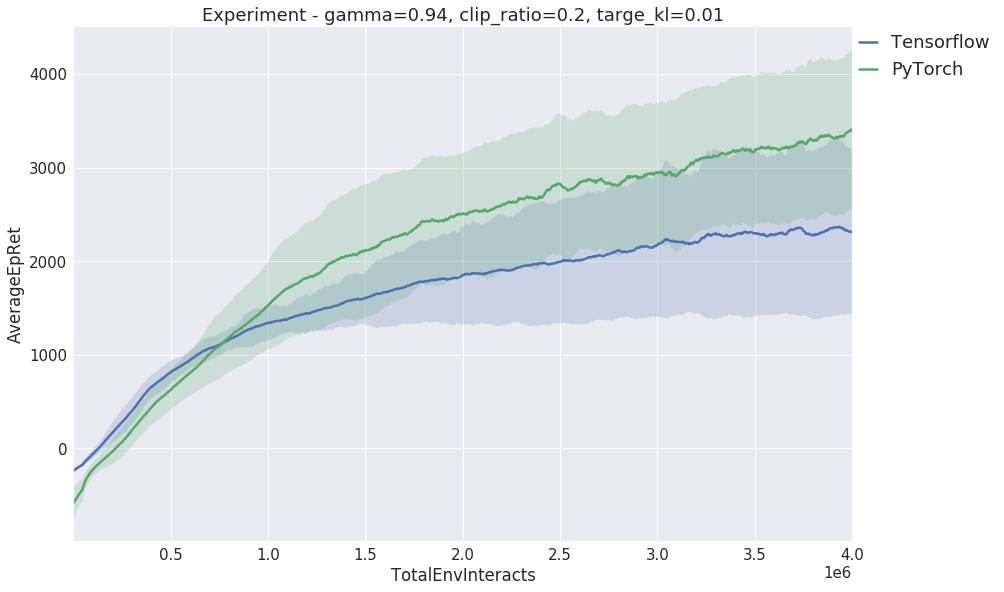

In [8]:
unique_experiments_names = set([experiment.split('half-cheetah_halfcheetah-v2_')[1] for experiment in all_experiments])
for experiment_name in unique_experiments_names:
    plot_experiment(experiment_name)